In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('result_perfect_foresight.csv', parse_dates=['datetime'], index_col='datetime')

In [13]:
daily_amounts = df.groupby(pd.Grouper(freq='D'))['power'].agg([('daily_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                                               ('daily_charge', lambda dispatch: dispatch[dispatch<0].sum()/2)])

<Axes: xlabel='datetime'>

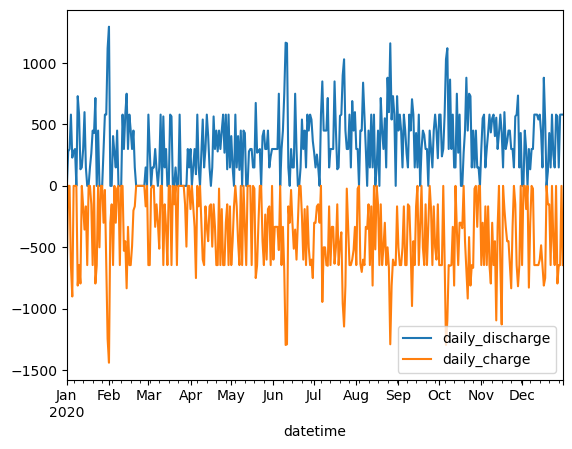

In [14]:
daily_amounts.plot(legend=True)

<Axes: xlabel='datetime'>

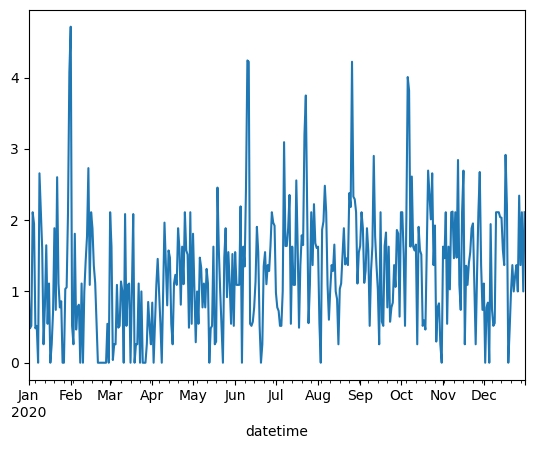

In [15]:
daily_cycles = df.groupby(pd.Grouper(freq='D'))['power'].agg([('daily_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                                               ('daily_charge', lambda dispatch: dispatch[dispatch<0].sum()/2),
                                                               ('cycles', lambda dispatch: abs(dispatch).sum()/2/580)])
daily_cycles['cycles'].plot()

In [16]:
discharge_efficiency = 0.9
charge_efficiency = 0.9

top_avg_price = df.groupby(pd.Grouper(freq='D'))['spot_price'].apply(lambda grp: grp.nlargest(4).mean())
bottom_avg_price = df.groupby(pd.Grouper(freq='D'))['spot_price'].apply(lambda grp: grp.nsmallest(4).mean())
daily_price_spread = (top_avg_price * discharge_efficiency) - (bottom_avg_price / charge_efficiency)
daily_price_spread.rename('price_spread', inplace=True)

daily_price_spread

datetime
2020-01-01     51.433000
2020-01-02     28.966667
2020-01-03     35.421472
2020-01-04    199.503222
2020-01-05     76.468722
                 ...    
2020-12-27     76.374583
2020-12-28     57.751889
2020-12-29     59.610500
2020-12-30     28.661694
2020-12-31     68.319389
Freq: D, Name: price_spread, Length: 366, dtype: float64

<Axes: xlabel='datetime'>

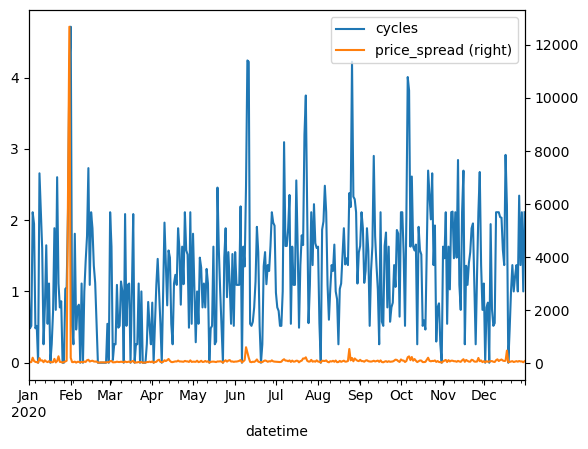

In [17]:
price_vs_cycles = pd.concat([daily_cycles['cycles'], daily_price_spread], axis=1)
price_vs_cycles.plot(secondary_y=['price_spread'], legend=True)

In [18]:
price_vs_cycles[price_vs_cycles['cycles']>2]

,cycles,price_spread
datetime,,
2020-01-04,2.111111,199.503222
2020-01-09,2.657088,185.561917
2020-01-10,2.111111,90.169639
2020-01-22,2.602490,73.515944
2020-01-30,2.111111,6652.748361
...,...,...
2020-12-17,2.915709,87.373694
2020-12-18,2.198276,468.330972
2020-12-27,2.343870,76.374583


In [19]:
df.groupby(pd.Grouper(freq='Y'))['power'].agg([('annual_discharge', lambda dispatch: dispatch[dispatch>=0].sum()/2),
                                               ('annual_charge', lambda dispatch: dispatch[dispatch<0].sum()/2),
                                               ('cycles', lambda dispatch: abs(dispatch).sum()/2/580)])

,annual_discharge,annual_charge,cycles
datetime,,,
2020-12-31,127020.0,-141133.333333,462.333333
